<a href="https://colab.research.google.com/github/LagosJA/Mineria_de_Datos/blob/main/Avance_II_PIA_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segundo Avance PIA**
Equipo 1

Grupo 002 Miércoles 7-10 PM

Integrantes:


*   1851448 Muñoz Barrientos Regina
*   1941592 Lagos Martinez José Alejandro
*   1793775 Rodriguez Guerrero Luisa Victoria
*   1849202 Dominguez Victorino Cesar Oswaldo


**CORAZÓN A RITMO SANO**

https://www.kaggle.com/ronitf/heart-disease-uci

 **Introducción.**

El corazón es uno de los órganos más importantes ya que bombea sangre y suministra oxígeno y nutrientes a todo el cuerpo. Como cumple con estas funciones tan cruciales su bienestar es de suma importancia. Según la OMS, las enfermedades cardiovasculares son actualmente la principal causa de fallecimiento en todo el mundo representando un 31% de todas las muertes registradas. Una herramienta que explore datos sobre la salud de un paciente y datos sobre su corazón podría ayudar a reducir el tiempo en el que a éste se le brinde un diagnóstico y así iniciar tratamiento correspondiente lo más pronto posible, incrementando sus posibilidades de recuperación e incluso prevenir la muerte.

**Descripción de los datos.**

Se cuenta con una base de datos de tipo .csv con 303 filas, cada fila contiene información real por paciente y contiene 14 columnas, las columnas son las siguientes:

*   **age:**  La edad del paciente en años.
*   **sex:** El sexo del paciente siendo 1 = hombre y  0 = mujer.
*   **cp:** el tipo de dolor en el pecho que experimenta el paciente: (Valor 1: angina típica, Valor 2: angina atípica, Valor 3: dolor no anginoso, Valor 0: asintomático).
*   **trestbps:** La presión sanguínea en mmHg tomada al momento de admisión al hospital.
*   **chol:** La medida de colesterol en mg/dl
*   **fbs:** “Fasting Blood Sugar” es decir el nivel de azúcar en la sangre de la persona en ayunas, si es mayor de 120 mg/dl se le asigna el valor de 1, de lo contrario se le asigna el valor de 0 (> 120 mg/dl, 1 = true; 0 = false).
*   **restecg:** Medición electrocardiográfica en reposo (0 = normal, 1 = con anomalía de la onda ST-T, 2 = muestra una probable o definitiva hipertrofia ventricular izquierda según los criterios de Estes)
*   **thalach:** El ritmo cardíaco máximo alcanzado por el paciente en latidos por minuto.
*   **exang:** Angina de pecho por ejercicio (1 = si se tiene el síntoma; 0 = no se tiene)
*   **oldpeak:** Depresión del ST inducida por el ejercicio en relación con el reposo.
*   **slope:** la pendiente del pico del segmento ST de ejercicio (Valor 1: pendiente ascendente, Valor 2: plano, Valor 3: pendiente descendente)
*   **ca:** El número de vasos principales (0-3)
*   **thal:** Un trastorno sanguíneo llamado talasemia (1 = normal; 2 = defecto fijo; 3 = defecto reversible)
*   **target:** El paciente tiene una enfermedad del corazón  (0 = no, 1 = si)

**Justificación del uso de datos.**

Debido a que en México y en el mundo, la cantidad de personas que fallecen a causa de una enfermedad del cardiovascular es enorme, hacer uso de datos para encontrar indicadores de mala salud del corazón es importante.
Dentro de la base de datos se encuentra información que puede ser de ayuda para la prevención de dichas enfermedades de corazón, como lo son la edad del paciente, el tipo de dolor de pecho, la presión sanguínea al momento de presentar dolor, si se pudo o no tratar la enfermedad presentada en un paciente, entre otros aspectos importantes. Además de esto, otro factor favorable que se notó al hacer uso de estos datos, es la importancia que tiene cada uno de ellos hacia el proyecto, su fácil entendimiento y manipulación,  y a su vez el impacto favorable que tendrá para el cumplimiento del objetivo principal.

Una gran oportunidad para crear un método de contingencia en caso de que un paciente presente alguno de estos síntomas junto con sus características, debido a la complejidad de diagnóstico de una enfermedad cardiaca cada dato presentado es importante en la contribución de la resolución del problema planteado. Como ya fue mencionado, debido al entendimiento que se logró de cada columna de datos, podemos manejarlos de una forma eficiente y que cumpla con lo que se busca lograr.

**Objetivo principal.**

Clasificar el diagnóstico sobre la enfermedad de corazón según los resultados de los exámenes y datos biométricos del paciente.

**Objetivos secundarios.**

*   Identificar datos de mayor influencia al momento de realizar un diagnóstico.
*   Encontrar si existen algún grupo de edad o sexo sea más propenso a presentar problemas cardiacos.


**Desarrollo de las herramientas.**

*Limpieza*

Primero se muestra la base de datos original.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("heart.csv")
df = pd.read_csv("heart.csv",encoding='utf8')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


El primer cambio que se realizó fue renombrar las columnas para un entendimiento más claro.

In [3]:
df.columns = ['Edad','Sexo','DolorPecho','PresArtRep','Col','NivAzuAyu','Electro','MaxRitCard','Angina','MinElectro','Pendiente','NumVasSang','thal','Objetivo']
df.head()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Después se escaneó la base de datos en busca de datos nulos y se descubrio que no existía ninguno.

In [4]:
df.isnull().sum()

Edad          0
Sexo          0
DolorPecho    0
PresArtRep    0
Col           0
NivAzuAyu     0
Electro       0
MaxRitCard    0
Angina        0
MinElectro    0
Pendiente     0
NumVasSang    0
thal          0
Objetivo      0
dtype: int64

*Estadística Básica de los Datos*

Vemos que no hay ningún dato nulo así que procedemos a la sección de Estadística.

In [5]:
df.describe()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Nótese que en la columna NumVasSang el máximo es 4 y que en la columna thal el mínimo es 0.

Según la descripción de los datos en Kaggle, la columna thal debe contener valores 1, 2 ó 3, por lo que el mínimo no debería ser cero.
De la misma forma para la columna NumVasSang, esta debe contener datos 0, 1, 2 ó 3, como el máximo es 4, significa que algo no está bien.

Se descubrieron estas inconformidades entre los datos, por lo que se investigó y se encontró que los datos fueron obtenidos de las bases de datos del hospital de Cleveland y comparando estas dos bases se descubrió que sí existían datos nulos en la original y en la utilizada habían sido llenados con otros valores por lo que se decidió eliminar las filas que contenían estos datos nulos.

Esta información se consiguió en este foro de discusión: [https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877)



In [7]:
df1=df.drop(df[df['NumVasSang'] == 4].index)
df1=df1.drop(df1[df1['thal'] == 0].index)
df1.describe()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [14]:
df1.to_csv("/content/HeartLimpio.csv",index=False)

Se eliminaron y registros por los motivos anteriores. Entre los aspectos importantes a notar sobre la estadística de los datos es que la media y mediana de colesterol son mayores a 200 mg/dL. Un nivel normal de colesterol es entre 125 y 200 mg/dL. Es decir que la mayoría de los pacientes en el registro presentan un nivel alto de colesterol.

Como la columna de NivAzuAyu vale 1 si el nivel de azucar es alto y 0 si no, la media es la proporción de pacientes que si cumplen con la condición. En este caso solo 14.52% de los pacientes presentan un nivel de azucar mayor a 120 mg/dL.

Con la misma lógica, vemos que el 67.9% de los registros corresponden a pacientes del sexo masculino. Observamos 54% de los pacientes fueron diagnosticados con una enfermedad del corazón. Además la edad media de los pacientes es de 54.52 años.

_Visualización_

Empezaremos con la proporción de pacientes diagnosticados con una enfermedad del corazón en la base de datos. Nos apoyaremos de una gráfica de pastel.

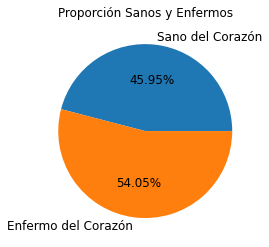

In [19]:
df_target = df1.groupby("Objetivo").size()
plt.pie(df_target.values, labels = ["Sano del Corazón", "Enfermo del Corazón"], autopct='%1.2f%%', radius = 1, textprops = {"fontsize" : 12}) 
plt.title("Proporción Sanos y Enfermos")
plt.show()

En esta gráfica podemos ver que contamos con una proporción similar de registros para pacientes que fueron diagnosticados con una enfermedad del corazón y los que no. ¿Qué pasa si los separamos por sexo?

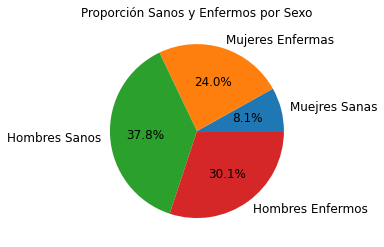

In [20]:
df_sex = df1.groupby(["Sexo","Objetivo"]).size()
plt.pie(df_sex.values, labels = ["Muejres Sanas", "Mujeres Enfermas", "Hombres Sanos", "Hombres Enfermos"],autopct='%1.1f%%',radius = 1, textprops = {"fontsize" : 12})
plt.title("Proporción Sanos y Enfermos por Sexo")
plt.show()

Separando los pacientes por su sexo y su diagnóstico obtenemos más información. Hay casi tres veces la cantidad de mujeres que fueron diagnosticadas con enfermedades del corazón en comparación a las que no. En el caso de los hombres, hay más sanos que enfermos. También vemos que hay aproximadamente el doble de pacientes masculinos a comparación a los del sexo femenino.

Viendo esta relación entre el sexo y el diagnóstico, ¿cómo afectará la edad al diagnóstico?

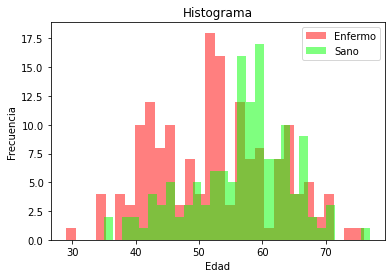

In [21]:
m = plt.hist(df[df["Objetivo"] == 1].Edad,bins=30,fc = (1,0,0,0.5),label = "Enfermo")
b = plt.hist(df[df["Objetivo"] == 0].Edad,bins=30,fc = (0,1,0,0.5),label = "Sano")
plt.legend()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

A diferencia de lo que se esperaría, la disribución de frecuencia de los pacientes diagnosticados con enfermedades del corazón está a la izquierda de los pacientes sanos del corazón. Esto idica que en general los pacientes que son diagnosticados con una enfermedad del corazón tienden a ser más jóvenes que los sanos. Después de ver como el sexo y la edad afectan al diagnóstico, ¿qué informacón nos pueden dar los indicadores de salud sobre el diagnóstico?


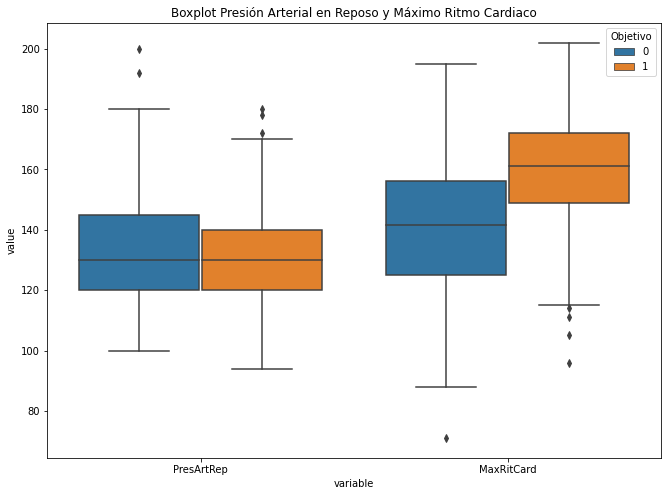

In [31]:
mdata = pd.melt(df1,id_vars = "Objetivo",value_vars = ['PresArtRep', 'MaxRitCard'])
plt.figure(figsize = (11,8))
sns.boxplot(x = "variable", y = "value", hue="Objetivo",data= mdata)
plt.title("Boxplot Presión Arterial en Reposo y Máximo Ritmo Cardiaco")
plt.show()

Vemos que los pacientes que no fueron diagnosticados con una enfermedad del corazón tienden a mostrar mayor presión arterial en reposo pero un máximo ritmo cardiaco más bajo. Otro indicador que es comunmente asociado con enfermedades del corazón es el nivel de colesterol.

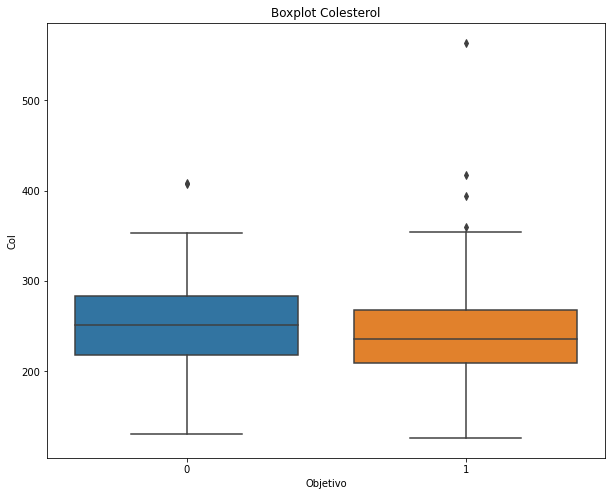

In [43]:
plt.figure(figsize = (10,8))
sns.boxplot(y='Col',x='Objetivo',data=df1)
plt.title("Boxplot Colesterol")
plt.show()

Se decidió revisar el colesterol por separado de la presión arterial y máximo ritmo cardiaco por temas de escala. Sorprendente el diagrama de caja de los pacientes sanos es muy similar al de aquellos que fueron diagnosticados con enfermedades del corazón, lo que nos hace inferir que el colesterol alto no afecta significativamente al diagnóstico del corazón del paciente.

El resultado de una fluorscopia revela cuantos vasos sanguíneos son visbles en el paciente. Si se observan pocos o ningun vaso sanguíneo esto puede indicar coágulos o mala circulación.

In [40]:
h=df1.loc[df['Objetivo']==1,'NumVasSang'].value_counts()
m=df1.loc[df['Objetivo']==0,'NumVasSang'].value_counts()
n=[0,1,2,3]
bd = pd.DataFrame({"Numero Vasos Sanguineos":n, "Enfermos":h, "Sanos":m})
bd= bd.set_index("Numero Vasos Sanguineos")
bd

,Enfermos,Sanos
Numero Vasos Sanguineos,,
0,129,44
1,21,44
2,7,31
3,3,17


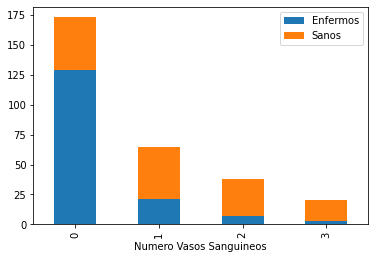

In [41]:
bd.plot.bar(stacked=True)

Observamos que entre menor es número de vasos sanguíneos observados, mayor es la frecuencia con la que se presentan pacientes diagnosticados con enfermedad del corazón.

Para concluir desde una perspectiva más genralizada realizaremos un correlograma para ver de qué forma las variables afectan a la columna objetivo.

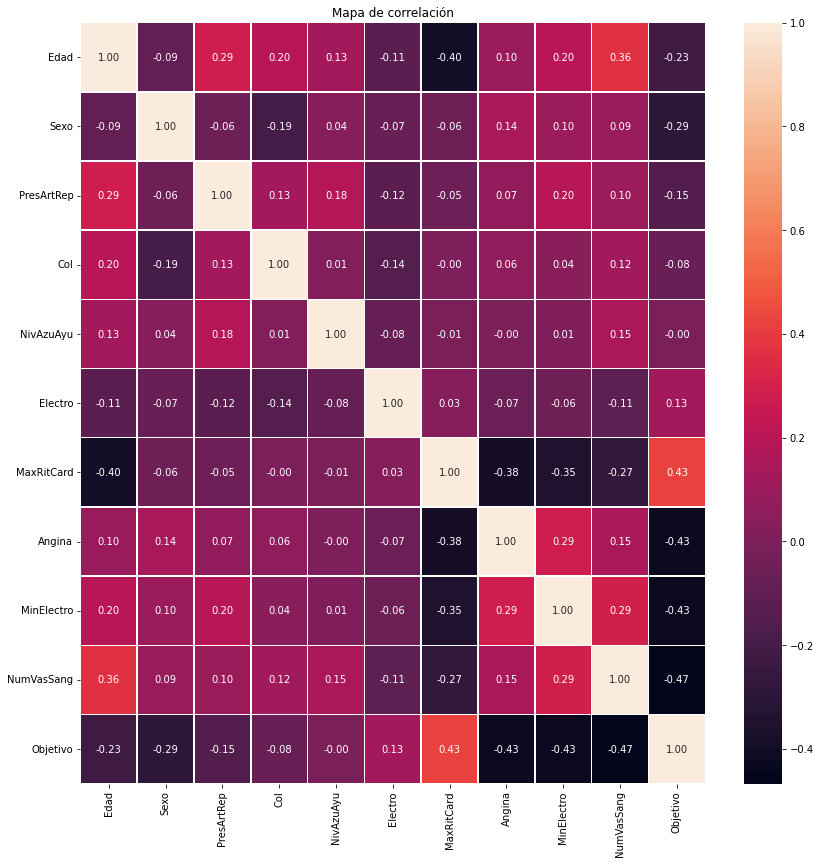

In [48]:
df0=df1.drop("DolorPecho",axis=1)
df0=df0.drop("thal",axis=1)
df0=df0.drop("Pendiente",axis=1) #Eliminamos las variables categoricas no binarias
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(df0.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Del correlograma podemos obtener conclusiones similares a las que nos brindaban las gráficas anteriores. La edad y el sexo se correlacionan de manera negativa al diagnostico. Es decir los hombres son menos propensos a ser diagnosticados con enfermedades del corazón en comparación a las mujeres y los pacientes mayores son diagnosticados con enfermades del corazón con menor frecuencia.

La correlación entre el diagnósitco y el colesterol es muy cercana a cero, es decir, no están correlacionados de manera significativa. La columna Angina indica si el paciente presenta dolor de pecho al hacer ejercicio. Esperaríamos que este fuera un indicador para el diagnóstico pero se correlaciona de forma negativa, lo que indica lo contrario.

En conclusión, después de analizar las variables y cómo se relacionan a la columna de interés Objetivo, la evidencia apunta a que la variabla con mayor influencia al momento de realizar el diagnóstico es el número de vasos sanguíneos observados en una fluorscopia (objetivo secundario). Otras variables que muestran alta correlación son máximo ritmo cardiaco, angina y Depresión del ST inducida por el ejercicio (MinElectro). Como el objetivo es encontrar un modelo que pueda clasificar un diagnóstico a partir de los datos del paciente, el equipo se interesa por temas como Regresión Logística.

